# **Support Vector Machines**



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from sklearn import svm

In [2]:
mat = loadmat('ex6data1.mat')
print(mat.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X = mat['X']
y = mat['y']

X

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

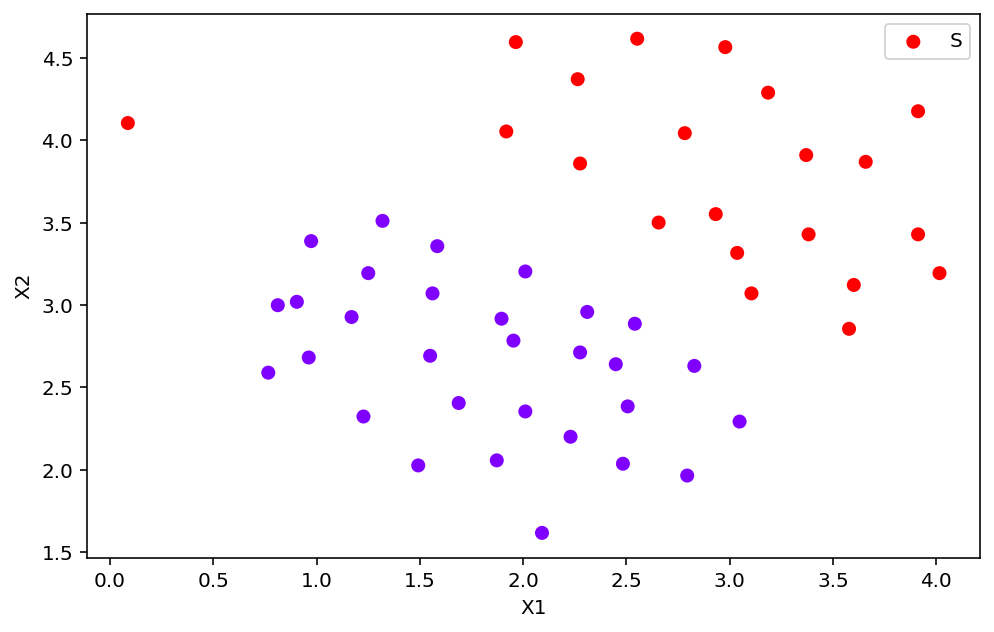

In [3]:
def plotData(X, y):
    plt.figure(figsize=(8,5))
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='rainbow')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend('SVM') 
plotData(X, y)

In [4]:
def plotBoundary(clf, X):
    '''plot decision bondary'''
    x_min, x_max = X[:,0].min()*1.2, X[:,0].max()*1.1
    y_min, y_max = X[:,1].min()*1.1,X[:,1].max()*1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z)

<Figure size 576x360 with 0 Axes>

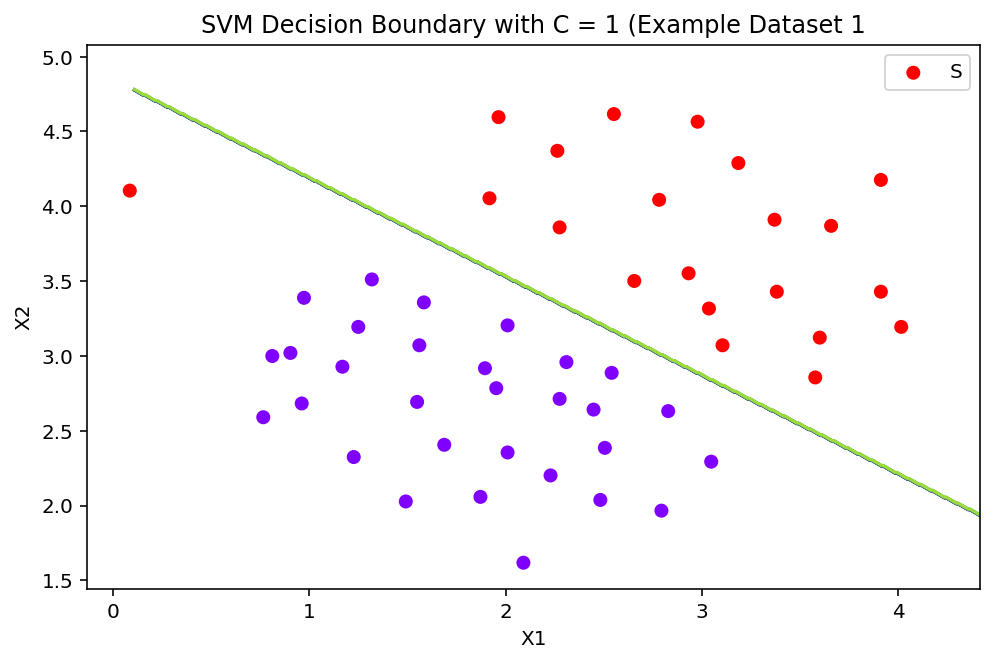

<Figure size 576x360 with 0 Axes>

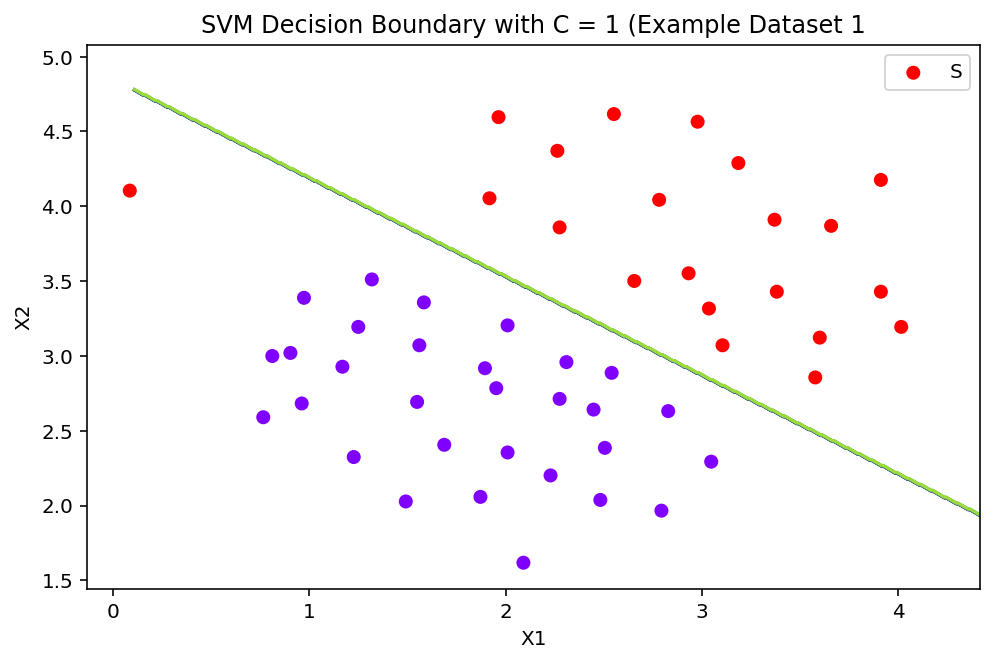

In [55]:
models = [svm.SVC(C=1, kernel='linear') for C in [1, 1]]
clfs = [model.fit(X, y.ravel()) for model in models]

title = ['SVM Decision Boundary with C = {} (Example Dataset 1'.format(C) for C in [1, 1]]
for model,title in zip(clfs,title):
    plt.figure(figsize=(8,5))
    plotData(X, y)
    plotBoundary(model, X)
    plt.title(title)
    plt.legend('SVM') 

<Figure size 576x360 with 0 Axes>

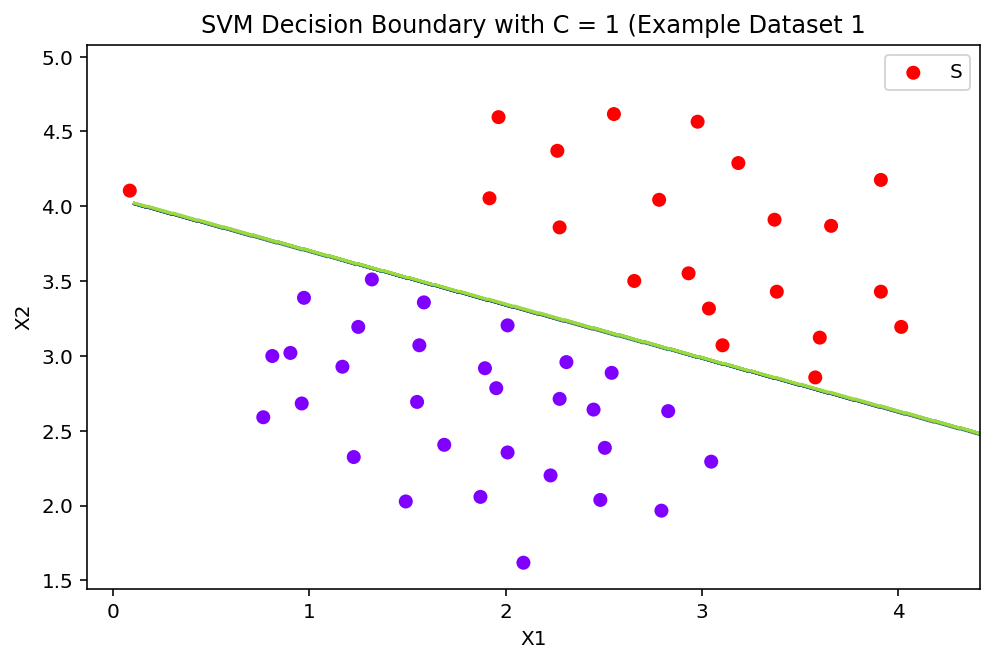

<Figure size 576x360 with 0 Axes>

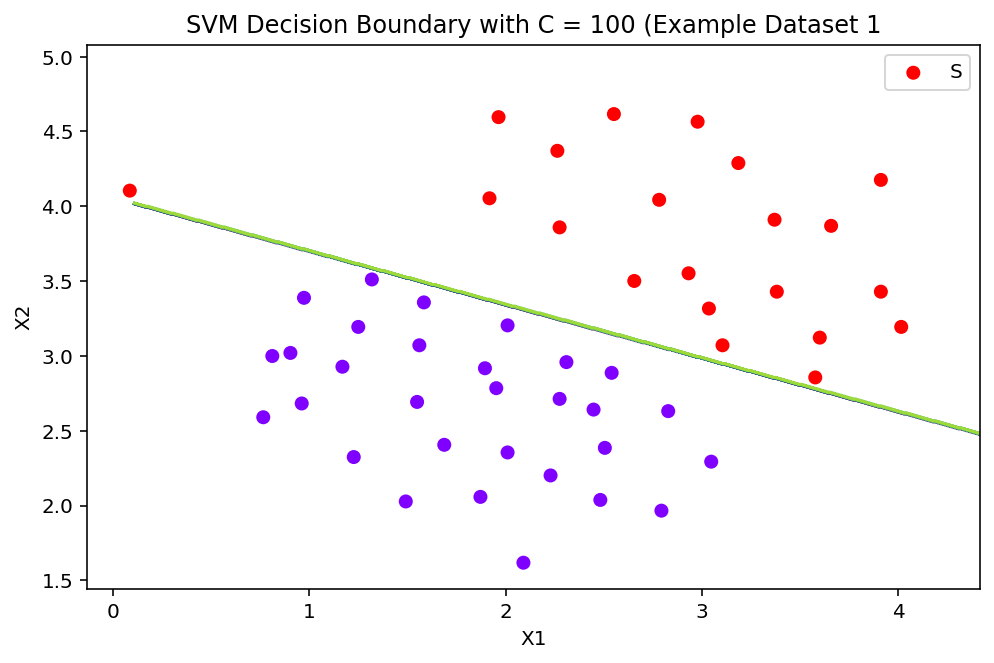

In [56]:
models = [svm.SVC(C=100, kernel='linear')for C in [1, 100]]
clfs = [model.fit(X, y.ravel()) for model in models]

title = ['SVM Decision Boundary with C = {} (Example Dataset 1'.format(C) for C in [1, 100]]
for model,title in zip(clfs,title):
    plt.figure(figsize=(8,5))
    plotData(X, y)
    plotBoundary(model, X)
    plt.title(title)
    plt.legend('SVM') 

1.2 SVM with Gaussian Kernels

這部分，使用SVM做非線性分類。我們將使用高斯核函式。

為了用SVM找出一個非線性的決策邊界，我們首先要實現高斯核函式。我可以把高斯核函式想象成一個相似度函式，用來測量一對樣本的距離，(x^{(i)}, y^{(j)})(x(i),y(j)) 。

這裡我們用sklearn自帶的svm中的核函式即可。

1.2.1 Gaussian Kernel

In [57]:
mat = loadmat('ex6data2.mat')
X2 = mat['X']
y2 = mat['y']


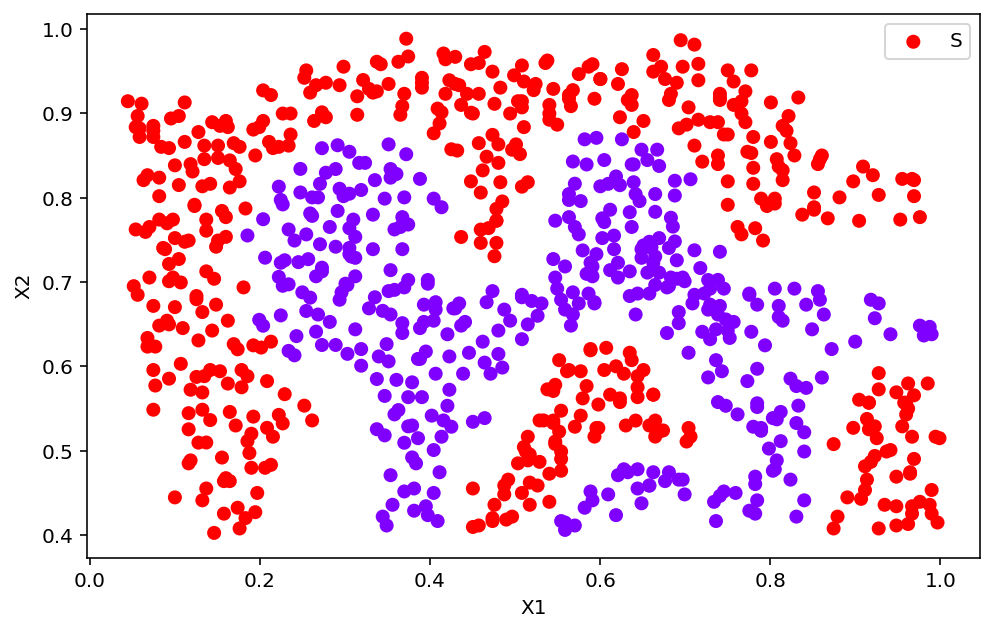

In [58]:
plotData(X2, y2)

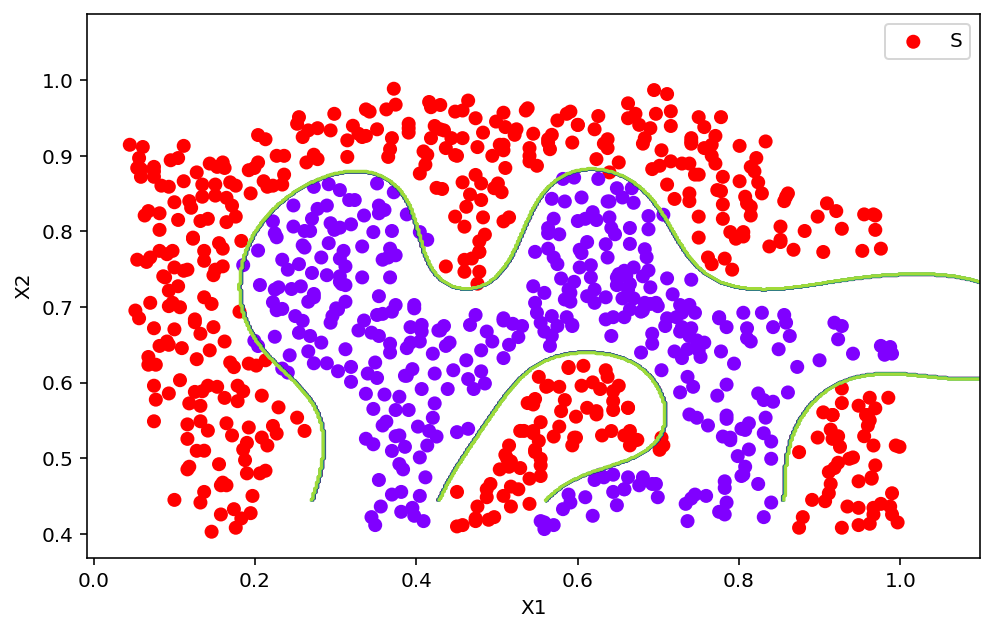

In [59]:
sigma = 0.1
gamma = np.power(sigma,-2.)/2
clf = svm.SVC(C=1, kernel='rbf', gamma=gamma)
modle = clf.fit(X2, y2.flatten())
plotData(X2, y2)
plotBoundary(modle, X2)

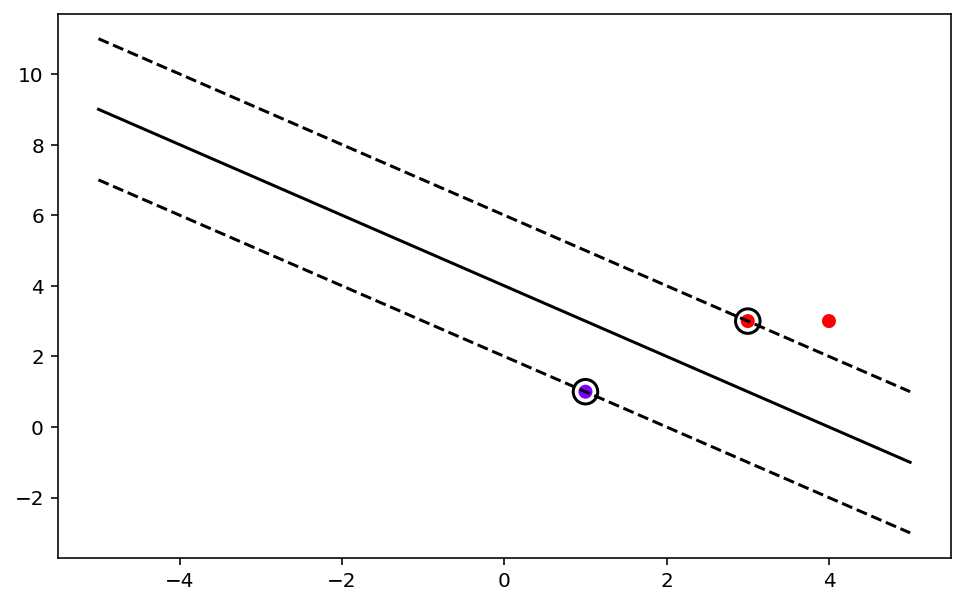

[ 1.   1.5 -1. ]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)

X = np.array([[3,3],[4,3],[1,1]])
Y = np.array([1,1,-1])

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(8,5))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


# 圈出支援向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', linewidths=1.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.rainbow)

plt.axis('tight')
plt.show()

print(clf.decision_function(X))

Spam Classification

  Preprocessing Emails

In [5]:
with open('emailSample1.txt', 'r') as f:
    email = f.read()
    print(email)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [7]:
#!pip3 install stemming
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
import re #regular expression for e-mail processing

# 這是一個可用的英文分詞演算法(Porter stemmer)
from stemming.porter2 import stem

# 這個英文演算法似乎更符合作業裡面所用的程式碼，與上面效果差不多
import nltk, nltk.stem.porter

In [8]:
def processEmail(email):
    """做除了Word Stemming和Removal of non-words的所有處理"""
    email = email.lower()
    email = re.sub('<[^<>]>', ' ', email)  # 匹配<開頭，然後所有不是< ,> 的內容，知道>結尾，相當於匹配<...>
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email )  # 匹配//後面不是空白字元的內容，遇到空白字元則停止
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    email = re.sub('[\$]+', 'dollar', email)
    email = re.sub('[\d]+', 'number', email) 
    return email

In [9]:
def email2TokenList(email):
    """預處理資料，返回一個乾淨的單詞列表"""
    
    # I'll use the NLTK stemmer because it more accurately duplicates the
    # performance of the OCTAVE implementation in the assignment
    stemmer = nltk.stem.porter.PorterStemmer()
    
    email = processEmail(email)

    # 將郵件分割為單個單詞，re.split() 可以設定多種分隔符
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    
    # 遍歷每個分割出來的內容
    tokenlist = []
    for token in tokens:
        # 刪除任何非字母數字的字元
        token = re.sub('[^a-zA-Z0-9]', '', token);
        # Use the Porter stemmer to 提取詞根
        stemmed = stemmer.stem(token)
        # 去除空字串‘’，裡面不含任何字元
        if not len(token): continue
        tokenlist.append(stemmed)
            
    return tokenlist  

In [10]:
def email2VocabIndices(email, vocab):
    """提取存在單詞的索引"""
    token = email2TokenList(email)
    index = [i for i in range(len(vocab)) if vocab[i] in token ]
    return index

In [11]:
def email2FeatureVector(email):
    """
    將email轉化為詞向量，n是vocab的長度。存在單詞的相應位置的值置為1，其餘為0
    """
    # df = pd.read_table('sample_data/vocab.txt',names=['words'])
    df = pd.read_csv('vocab.txt',names=['words'], delimiter = "\t")
    print(df)
    vocab = df.values  # return array
    vector = np.zeros(len(vocab))  # init vector
    vocab_indices = email2VocabIndices(email, vocab)  # 返回含有單詞的索引
    # 將有單詞的索引置為1
    for i in vocab_indices:
        vector[i] = 1
    return vector

In [12]:
vector = email2FeatureVector(email)
print('length of vector = {}\nnum of non-zero = {}'.format(len(vector), int(vector.sum())))

         words
1           aa
2           ab
3         abil
4          abl
5        about
...        ...
1895      your
1896  yourself
1897     zdnet
1898      zero
1899       zip

[1899 rows x 1 columns]


length of vector = 1899
num of non-zero = 45


In [13]:
# Training set
mat1 = loadmat('spamTrain.mat')
X, y = mat1['X'], mat1['y']

# Test set
mat2 = loadmat('spamTest.mat')
Xtest, ytest = mat2['Xtest'], mat2['ytest']
clf = svm.SVC(C=0.1, kernel='linear')
clf.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear')

In [14]:
predTrain = clf.score(X, y)
predTest = clf.score(Xtest, ytest)
predTrain, predTest

(0.99825, 0.989)